In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pylab as plt
import matplotlib.font_manager as fm
from torch.utils.data import DataLoader

# our scripts and functions
import src.processing as sp
from src.dataset import DataSet
import utils.imaging as ui
import settings as st 

# prop = fm.FontProperties(fname='/data/phys-zooniverse/phys2286/pytorch-env39/fonts/open-fonts/Roboto-Light.ttf')

In [ ]:
# load the file Mike shared
tags = pd.read_csv(st.data_dir + '/' +'tags.csv')

In [ ]:
# find the images fo which we have tags 
df_exists = sp.find_exist_img(tags, save=False)

In [ ]:
# keep only the data in a nice format 
df = sp.process_meta(df_exists, save=True, filename = 'tags_images')

In [ ]:
df.head()

In [ ]:
rings = df[df['tag'].isin(['ring'])]

In [ ]:
plt.figure(figsize = (16, 8))
plt.suptitle('Rings', fontsize=20, fontproperties=prop)
for i in range(8):
    path, filename = ui.object_name(rings.iauname.iloc[i])
    im_pil, im_arr = ui.load_image(st.decals + '/' + path + '/', filename)
    
    plt.subplot(2, 4, i+1)
    plt.imshow(im_arr)
    plt.title(rings.iauname.iloc[i], fontproperties=prop)
    plt.axis('off')
# plt.savefig('../plots/decals_dr5_rings.pdf', bbox_inches = 'tight')
plt.show()

### Load and Save csv files according to tag names

NOTE: This should be done ONCE. We do not want to change the files once they have been generated. 

In [ ]:
# df = hp.load_csv(st.data_dir, 'tags/tags_images')

In [ ]:
# objects = sp.select_df_tags(df, ['spiral', 'ring', 'elliptical'], save=False)

### Fetch the files from Mike's folder

NOTE: This should be done ONCE.

In [ ]:
# sp.search_save_database('spiral')
# sp.search_save_database('ring')
# sp.search_save_database('elliptical')

### Generate a random set of $N$ images per tag

NOTE: This should be done ONCE. Hence, just to be on the safe side, save = False below.

In [ ]:
# sp.generate_random_set(['spiral', 'elliptical', 'ring'], 500, save = False)

## Compute Summary Statistics of the Images

In [ ]:
# m,s = ui.compute_statistics(st.data_dir + '/categories/')

### Split the data in Training and Validation

In [ ]:
# d = sp.split_data(['spiral', 'elliptical', 'ring'], val_size = 0.35, save = True)

### Dataloader for PyTorch

In [24]:
train_dataset = DataSet(st.train_path, shuffle=True, augment=False, normalise=False)
val_dataset = DataSet(st.val_path, shuffle=False, augment=False, normalise=False)

In [25]:
train_dataloader = DataLoader(train_dataset, batch_size=8, drop_last=True)
val_dataloader = DataLoader(val_dataset, batch_size=8)

In [26]:
examples_train = iter(train_dataloader)
data_train = examples_train.next()

In [27]:
img1 = data_train[0][0]
img2 = data_train[0][1]

In [28]:
labels = data_train[1].numpy().flatten()
labels = np.array(labels, dtype = int)

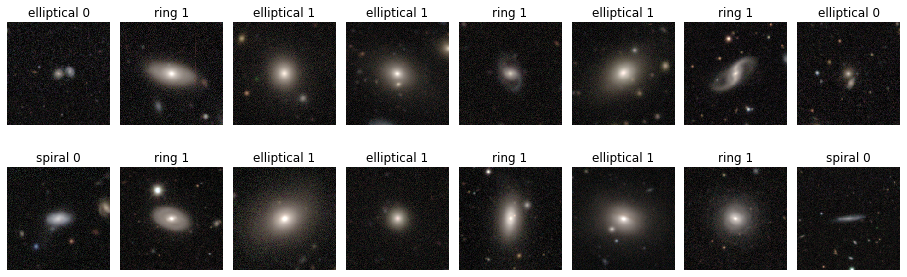

In [29]:
plt.figure(figsize = (16,8))
for i in range(8):
    
    plt.subplot(2,8,i+1)
    x = img1[i]
    plt.imshow(np.transpose(x.numpy(), (1, 2, 0)))
    plt.title(data_train[2][0][i]+ ' ' + str(labels[i]))
    plt.axis('off')
    
    plt.subplot(2,8,8+i+1)
    x = img2[i]
    plt.imshow(np.transpose(x.numpy(), (1, 2, 0)))
    plt.title(data_train[2][1][i]+ ' ' + str(labels[i]))
    plt.axis('off')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=-0.5)
plt.show()

In [30]:
import src.networks as sn

In [31]:
network = sn.SiameseNetwork(backbone="resnet18")

In [32]:
network.forward(data_train[0][0], data_train[0][1])

tensor([[0.5290],
        [0.3125],
        [0.3106],
        [0.3994],
        [0.3286],
        [0.5077],
        [0.3374],
        [0.3602]], grad_fn=<SigmoidBackward0>)

In [33]:
network2 = sn.Siamese()

In [34]:
network2.forward(data_train[0][0], data_train[0][1])

tensor([[0.4997],
        [0.4996],
        [0.4996],
        [0.4996],
        [0.4997],
        [0.4996],
        [0.4997],
        [0.4997]], grad_fn=<SigmoidBackward0>)

In [40]:
print(sum(p.numel() for p in network.parameters()))

12236073
